In [1]:
import pandas as pd

df = pd.DataFrame({'A형':[32,27,38,42,43],
                   'B형':[31,32,22,10,11],
                   'O형':[28,29,30,44,41],
                   'AB형':[10,13,10,4,5]},
                  index=['한국','중국','일본','미국','독일'])
df


,A형,B형,O형,AB형
한국,32,31,28,10
중국,27,32,29,13
일본,38,22,30,10
미국,42,10,44,4
독일,43,11,41,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 한국 to 독일
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A형      5 non-null      int64
 1   B형      5 non-null      int64
 2   O형      5 non-null      int64
 3   AB형     5 non-null      int64
dtypes: int64(4)
memory usage: 200.0+ bytes


In [3]:
# 스위스 50,7,40,3
df.loc['스위스']=[50,7,40,3]
df

,A형,B형,O형,AB형
한국,32,31,28,10
중국,27,32,29,13
일본,38,22,30,10
미국,42,10,44,4
독일,43,11,41,5
스위스,50,7,40,3


In [4]:
# 데이터 추출하기
# df.loc[인덱스, 컬럼명]
df.loc['한국']

A형     32
B형     31
O형     28
AB형    10
Name: 한국, dtype: int64

In [5]:
df.iloc[0]

A형     32
B형     31
O형     28
AB형    10
Name: 한국, dtype: int64

In [6]:
# 중국의 B형의 비율은?
df.loc['중국','B형']

32

In [7]:
df.iloc[1,1]

32

In [8]:
# 여러개의 행 데이터 추출
# 한국, 일본의 혈액형 데이터 추출
df.loc[['한국','일본']]

,A형,B형,O형,AB형
한국,32,31,28,10
일본,38,22,30,10


In [9]:
df.A형

한국     32
중국     27
일본     38
미국     42
독일     43
스위스    50
Name: A형, dtype: int64

In [10]:
df['A형']

한국     32
중국     27
일본     38
미국     42
독일     43
스위스    50
Name: A형, dtype: int64

In [11]:
# 여러개의 컬럼 데이터 추출
df.loc[:,['A형','O형']]


,A형,O형
한국,32,28
중국,27,29
일본,38,30
미국,42,44
독일,43,41
스위스,50,40


In [12]:
df[['A형','O형']]

,A형,O형
한국,32,28
중국,27,29
일본,38,30
미국,42,44
독일,43,41
스위스,50,40


In [13]:
# 슬라이싱
df

,A형,B형,O형,AB형
한국,32,31,28,10
중국,27,32,29,13
일본,38,22,30,10
미국,42,10,44,4
독일,43,11,41,5
스위스,50,7,40,3


In [14]:
# 행 단위 데이터 가져오기
df['중국':'독일']

,A형,B형,O형,AB형
중국,27,32,29,13
일본,38,22,30,10
미국,42,10,44,4
독일,43,11,41,5


In [15]:
df[:3]

,A형,B형,O형,AB형
한국,32,31,28,10
중국,27,32,29,13
일본,38,22,30,10


## 불리언 인덱싱(조건에 맞는 데이터 가져오기)
* df[조건]

In [16]:
# A형이 40%이상인 데이터 추출하기
df[df['A형'] >= 40 ]

,A형,B형,O형,AB형
미국,42,10,44,4
독일,43,11,41,5
스위스,50,7,40,3


In [17]:
# A형이 40%이상인 나라이름
df[df['A형'] >= 40 ].index

Index(['미국', '독일', '스위스'], dtype='object')

In [18]:
# A형이 40%이상인 나라의 B형 데이터 추출
df[df['A형'] >= 40 ].B형

미국     10
독일     11
스위스     7
Name: B형, dtype: int64

In [19]:
# A형이 40%이상인 나라의 B형,AB형 데이터 추출
df[df['A형'] >= 40 ][['B형','AB형']]

,B형,AB형
미국,10,4
독일,11,5
스위스,7,3


In [20]:
# A형이 40%이상이면서 O형이 40%이상인 나라의 데이터 추출하기 (and -> &, or -> |)
df[(df['A형'] >= 40) & (df.O형 >= 40)]

,A형,B형,O형,AB형
미국,42,10,44,4
독일,43,11,41,5
스위스,50,7,40,3


In [21]:
# B형이 A형보다 많은 나라
df[df.B형 > df.A형]

,A형,B형,O형,AB형
중국,27,32,29,13


In [22]:
df

,A형,B형,O형,AB형
한국,32,31,28,10
중국,27,32,29,13
일본,38,22,30,10
미국,42,10,44,4
독일,43,11,41,5
스위스,50,7,40,3


In [23]:
# 데이터프레임을 파일로 저장하기
df.to_csv('혈액형.csv',encoding='cp949')

In [24]:
#csv파일을 데이터프레임으로 불러오기
df = pd.read_csv('혈액형.csv',encoding='cp949') #utf-8
df

,Unnamed: 0,A형,B형,O형,AB형
0,한국,32,31,28,10
1,중국,27,32,29,13
2,일본,38,22,30,10
3,미국,42,10,44,4
4,독일,43,11,41,5
5,스위스,50,7,40,3


In [25]:
# index 컬럼을 지정해서 불러오기
df = pd.read_csv('혈액형.csv',encoding='cp949', index_col=0)
df

,A형,B형,O형,AB형
한국,32,31,28,10
중국,27,32,29,13
일본,38,22,30,10
미국,42,10,44,4
독일,43,11,41,5
스위스,50,7,40,3


# matplotlib 활용 데이터 시각화

Text(0.5, 0.98, 'Categorical Plotting')

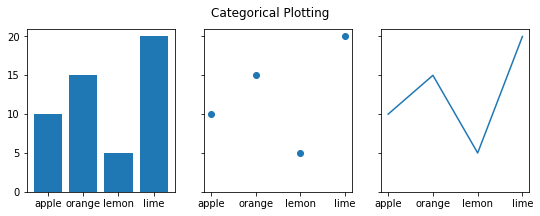

In [26]:
# matplotlib 홈페이지의 예제파일 실행해보기
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [27]:
# colab에서 matplotlib으로 그래프를 그릴 때 한글폰트를 사용하기 위한 처리
# 아래 코드 실행 후 런타임 다시 시작 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (41.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
# 멧플롯립 한글폰트 설정
import matplotlib.pyplot as plt

plt.rc('font',family='NanumBarunGothic') # 맑은 고딕으로 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스(-) 깨짐 방지


# 선그래프
* plt.plot(X축데이터,Y축데이터)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('혈액형.csv',encoding='cp949', index_col=0)
df

,A형,B형,O형,AB형
한국,32,31,28,10
중국,27,32,29,13
일본,38,22,30,10
미국,42,10,44,4
독일,43,11,41,5
스위스,50,7,40,3


## 국가별 A형 혈액형 선그래프 그리기

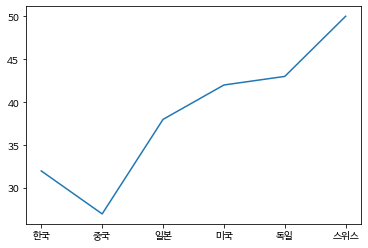

In [3]:
x = df.index
y = df.A형

plt.plot(x,y)
plt.show()

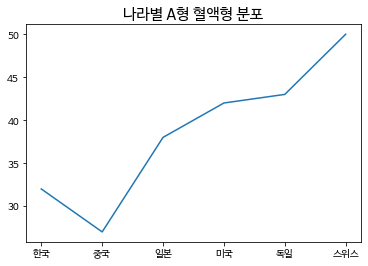

In [4]:
# 타이틀 추가하기
x = df.index
y = df.A형

plt.plot(x,y)
plt.title('나라별 A형 혈액형 분포', fontsize = 15)
plt.show()

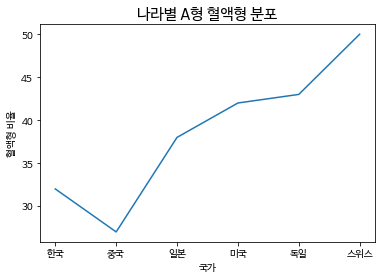

In [5]:
# X,Y축 레이블 축가하기
x = df.index
y = df.A형

plt.plot(x,y)
plt.title('나라별 A형 혈액형 분포', fontsize = 15)
plt.xlabel('국가')
plt.ylabel('혈액형 비율')
plt.show()

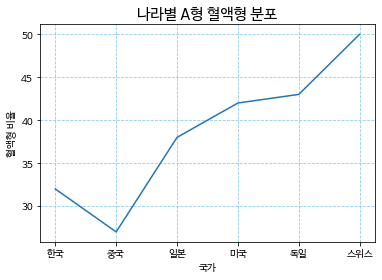

In [6]:
# grid 그리기
x = df.index
y = df.A형

plt.plot(x,y)
plt.title('나라별 A형 혈액형 분포', fontsize = 15)
plt.xlabel('국가')
plt.ylabel('혈액형 비율')
plt.grid(color='skyblue', ls='--')
plt.show()

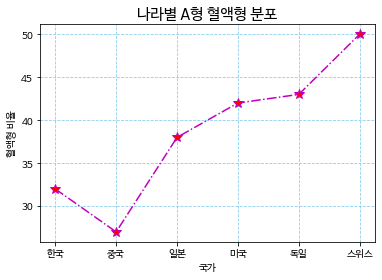

In [7]:
# 그래프(plot) 옵션
x = df.index
y = df.A형

plt.plot(x,y,color='m',marker='*',markerfacecolor='red',
         linestyle='-.',markersize=10)
plt.title('나라별 A형 혈액형 분포', fontsize = 15)
plt.xlabel('국가')
plt.ylabel('혈액형 비율')
plt.grid(color='skyblue', ls='--')
plt.show()

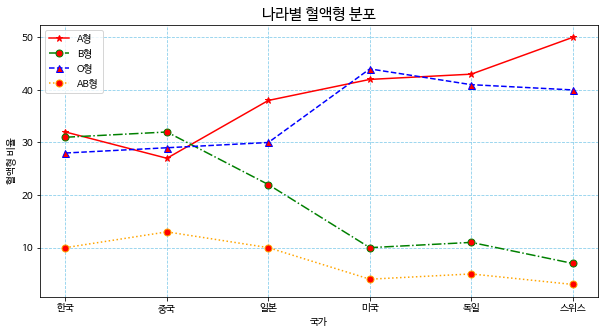

In [8]:
# 그래프 추가해서 그리기
plt.figure(figsize=(10,5)) #figure size 지정

x = df.index
y1 = df.A형
y2 = df.B형
y3 = df.O형
y4 = df.AB형

plt.plot(x,y1,label='A형', color='red',marker='*',markerfacecolor='red',
         linestyle='-',markersize=7)
plt.plot(x,y2,label='B형',color='green',marker='o',markerfacecolor='red',
         linestyle='-.',markersize=7)
plt.plot(x,y3,label='O형',color='blue',marker='^',markerfacecolor='red',
         linestyle='--',markersize=7)
plt.plot(x,y4,label='AB형',color='orange',marker='o',markerfacecolor='red',
         linestyle=':',markersize=7)

plt.title('나라별 혈액형 분포', fontsize = 15)
plt.xlabel('국가')
plt.ylabel('혈액형 비율')
plt.grid(color='skyblue', ls='--')
plt.legend()
plt.show()
